In [1]:
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

from bs4 import BeautifulSoup
import csv

!pip install geocoder
import geocoder # to get longitude and latitude

!conda install -c conda-forge folium=0.5.0 --yes
import folium # Map plotting library
import numpy as np
from pandas.io.json import json_normalize # Tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# Import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

/bin/bash: conda: command not found
     |████████████████████████████████| 98 kB 3.5 MB/s 
/bin/bash: conda: command not found
Libraries imported.


In [2]:
source = requests.get('https://en.wikipedia.org/wiki/Category:Areas_of_London').text 
soup = BeautifulSoup(source, 'lxml')

In [3]:
csv_file = open('manchester.csv', 'w')
csv_writer = csv.writer(csv_file)
csv_writer.writerow(['Neighbourhood'])

15

In [4]:
mwcg = soup.find_all(class_ = "mw-category-group")

length = len(mwcg) # Gets the length of number of `mw-category-groups` present

for i in range(1, length):  # Gets all the neighbourhoods
    lists = mwcg [i].find_all('a')
    for list in lists:
        nbd = list.get('title') # Gets the title of the neighbourhood
        csv_writer.writerow([nbd]) # Writes the name of the neighbourhood in the csv file

In [5]:
csv_file.close()

In [6]:
manchester_raw = pd.read_csv('manchester.csv')

In [7]:
manchester_raw.shape

(364, 1)

In [8]:
manchester_raw

,Neighbourhood
0,"Category:Acton, London"
1,Category:Aldwych
2,Category:Balham
3,"Category:Barking, London"
4,"Category:Barnes, London"
5,Category:Barnsbury
6,Category:Bayswater
7,Category:Beckton
8,Category:Belgravia
9,Category:Belsize Park


In [9]:
# Initialize varialbes
lat = []
lng = []
lat_lng_coords = None

# Get postcodes from neighbourhoods table
neighbourhoods = manchester_raw['Neighbourhood']

# Store latitude and longitude values in lat and lng
for nh in neighbourhoods:
    g = geocoder.arcgis('{}, Manchester, UK'.format(nh))
    lat_lng_coords = g.latlng
    lat.append(lat_lng_coords[0])
    lng.append(lat_lng_coords[1])

In [10]:
man_data = manchester_raw
man_data['Latitude'] = lat
man_data['Longitude'] = lng

In [11]:
man_data.head()

,Neighbourhood,Latitude,Longitude
0,"Category:Acton, London",51.506711,-0.267976
1,Category:Aldwych,53.451465,-2.227795
2,Category:Balham,53.470526,-2.226598
3,"Category:Barking, London",51.517420,-0.200040
4,"Category:Barnes, London",51.517420,-0.200040


In [12]:
CLIENT_ID = 'JW1LOUKCHOBJJGPYYZFROQZINFPN0AU4E44WNXM51NPILF3W' # your Foursquare ID
CLIENT_SECRET = 'QEEXIE4ODGP1UZVI35RD0OQL2XS2WQWE3ZNAQ3T4CMSOMZNJ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: JW1LOUKCHOBJJGPYYZFROQZINFPN0AU4E44WNXM51NPILF3W
CLIENT_SECRET:QEEXIE4ODGP1UZVI35RD0OQL2XS2WQWE3ZNAQ3T4CMSOMZNJ


In [13]:
from geopy.geocoders import Nominatim

address = 'Manchester, UK'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manchester are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manchester are 53.4794892, -2.2451148.


In [14]:
man_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(man_data['Latitude'], man_data['Longitude'], man_data['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(man_map)  
    
man_map

In [15]:
# Gets the name of the category

def get_category_type(row):
    categories_list = row['Category']  
    
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [16]:
explore_df_list = []

for i, nhood_name in enumerate(man_data['Neighbourhood']):  
    
    try :
        #Get neighbourhood data
        nhood_name = man_data.loc[i, 'Neighbourhood']
        nhood_lat = man_data.loc[i, 'Latitude']
        nhood_lng = man_data.loc[i, 'Longitude']

        radius = 1000 
        LIMIT = 30 

        url = 'https://api.foursquare.com/v2/venues/explore?client_id={} \
        &client_secret={}&ll={},{}&v={}&radius={}&limit={}'\
        .format(CLIENT_ID, CLIENT_SECRET, nhood_lat, nhood_lng, VERSION, radius, LIMIT)

        results = json.loads(requests.get(url).text)
        results = results['response']['groups'][0]['items']

        nearby = json_normalize(results) # Flatten JSON

        # Filter the columns
        filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
        nearby = nearby.loc[:, filtered_columns]

        # Rename the columns
        columns = ['Name', 'Category', 'Latitude', 'Longitude']
        nearby.columns = columns

        # Get the categories
        nearby['Category'] = nearby.apply(get_category_type, axis=1)    

        # Get the required data
        for i, name in enumerate(nearby['Name']):
            s_list = nearby.loc[i, :].values.tolist()  # Converts the numpy array to a python list
            f_list = [nhood_name, nhood_lat, nhood_lng] + s_list
            explore_df_list.append(f_list)
    
    except Exception as e:
        pass

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


In [17]:
explore_man = pd.DataFrame([item for item in explore_df_list])
explore_man.columns = ['Neighbourhood', 'Neighbourhood Latitude', 'Neighbourhood Longitude', 'Venue Name', 'Venue Category', 'Venue Latitude', 'Venue Longitude']
explore_man.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue Name,Venue Category,Venue Latitude,Venue Longitude
0,"Category:Acton, London",51.506711,-0.267976,Acton Centre,Gym / Fitness Center,51.506608,-0.266878
1,"Category:Acton, London",51.506711,-0.267976,MrBakeme,Creperie,51.508452,-0.268543
2,"Category:Acton, London",51.506711,-0.267976,Dragonfly Brewery at George & Dragon,Brewery,51.507378,-0.271702
3,"Category:Acton, London",51.506711,-0.267976,The Station House,Pub,51.508877,-0.263076
4,"Category:Acton, London",51.506711,-0.267976,London Star Hotel,Hotel,51.509624,-0.272456


In [18]:
man_1hot = pd.get_dummies(explore_man[['Venue Category']], prefix="", prefix_sep="")


# Add neighbourhood column back to dataframe
man_1hot['Neighbourhood'] = explore_man['Neighbourhood'] 


# Move neighbourhood column to the first column
fixed_columns = [man_1hot.columns[-1]] + man_1hot.columns[:-1].values.tolist()
man_1hot = man_1hot[fixed_columns]

man_1hot.head()

,Neighbourhood,Afghan Restaurant,African Restaurant,Airport Service,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Garage,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bar,Basketball Court,Beach,Bed & Breakfast,Beer Bar,Beer Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Green,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Burger Joint,Bus Station,Bus Stop,Business Service,Butcher,Café,Campground,Canal,Canal Lock,Caribbean Restaurant,Casino,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Cafeteria,Comedy Club,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Creperie,Cricket Ground,Cupcake Shop,Dam,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Doner Restaurant,Donut Shop,Dry Cleaner,Dumpling Restaurant,Electronics Store,English Restaurant,Escape Room,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Forest,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,Gelato Shop,General College & University,Gift Shop,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Health Food Store,Hill,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hockey Field,Hookah Bar,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Insurance Office,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Lebanese Restaurant,Light Rail Station,Lighthouse,Liquor Store,Locksmith,Lounge,Luggage Store,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nature Preserve,Newsagent,Nightclub,Noodle House,Optical Shop,Organic Grocery,Outdoors & Recreation,Outlet Mall,Outlet Store,Pakistani Restaurant,Palace,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Pie Shop,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Pool,Pop-Up Shop,Port,Portuguese Restaurant,Print Shop,Pub,Racetrack,Rafting,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Reservoir,Residential Building (Apartment / Condo),Restaurant,River,Road,Roller Rink,Roof Deck,Rugby Pitch,Rugby Stadium,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,South American Restaurant,South Indian Restaurant,Souvenir Shop,Souvlaki Shop,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stables,Stadium,Stationery Store,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Szechuan Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Theme Restaurant,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Track Stadium,Trail,Train Station,Tram Station,Tunnel,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Ware

In [19]:
man_grouped = man_1hot.groupby('Neighbourhood').mean().reset_index()
man_grouped.head()

,Neighbourhood,Afghan Restaurant,African Restaurant,Airport Service,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Garage,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bar,Basketball Court,Beach,Bed & Breakfast,Beer Bar,Beer Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Green,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Burger Joint,Bus Station,Bus Stop,Business Service,Butcher,Café,Campground,Canal,Canal Lock,Caribbean Restaurant,Casino,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Cafeteria,Comedy Club,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Creperie,Cricket Ground,Cupcake Shop,Dam,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Doner Restaurant,Donut Shop,Dry Cleaner,Dumpling Restaurant,Electronics Store,English Restaurant,Escape Room,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Forest,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,Gelato Shop,General College & University,Gift Shop,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Health Food Store,Hill,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hockey Field,Hookah Bar,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Insurance Office,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Lebanese Restaurant,Light Rail Station,Lighthouse,Liquor Store,Locksmith,Lounge,Luggage Store,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nature Preserve,Newsagent,Nightclub,Noodle House,Optical Shop,Organic Grocery,Outdoors & Recreation,Outlet Mall,Outlet Store,Pakistani Restaurant,Palace,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Pie Shop,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Pool,Pop-Up Shop,Port,Portuguese Restaurant,Print Shop,Pub,Racetrack,Rafting,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Reservoir,Residential Building (Apartment / Condo),Restaurant,River,Road,Roller Rink,Roof Deck,Rugby Pitch,Rugby Stadium,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,South American Restaurant,South Indian Restaurant,Souvenir Shop,Souvlaki Shop,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stables,Stadium,Stationery Store,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Szechuan Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Theme Restaurant,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Track Stadium,Trail,Train Station,Tram Station,Tunnel,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Ware

In [20]:
def top_common_venues(row, top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:top_venues]

In [21]:
top_venues = 10
indicators = ['st', 'nd', 'rd']

# Create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# Create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = man_grouped['Neighbourhood']

for ind in np.arange(man_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = top_common_venues(man_grouped.iloc[ind, :], top_venues)

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abbey Wood,Gym / Fitness Center,Bakery,Electronics Store,Soccer Stadium,Supermarket,Fast Food Restaurant,Park,Market,Gymnastics Gym,Train Station
1,Aberfeldy Village,American Restaurant,Pub,Beach,Park,Harbor / Marina,Food & Drink Shop,Fish & Chips Shop,Flea Market,Flower Shop,Food
2,"Acton Green, London",Supermarket,Park,Gymnastics Gym,Bus Stop,Athletics & Sports,Food Court,Flea Market,Flower Shop,Food,Food & Drink Shop
3,"Acton Vale, London",Pub,Gym / Fitness Center,Coffee Shop,Grocery Store,Indian Restaurant,Bakery,Creperie,Park,Fast Food Restaurant,Café
4,"Acton, London",Pub,Gym / Fitness Center,Coffee Shop,Grocery Store,Indian Restaurant,Bakery,Creperie,Park,Fast Food Restaurant,Café


In [22]:
man_grouped_clustering = man_grouped.drop('Neighbourhood', 1)

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

In [24]:
max_range = 15 #Max range 15 (number of clusters)

from sklearn.metrics import silhouette_samples, silhouette_score


indices = []
scores = []

for man_clusters in range(2, max_range) :
    
    # Run k-means clustering
    man_gc = man_grouped_clustering
    kmeans = KMeans(n_clusters = man_clusters, init = 'k-means++', random_state = 0).fit_predict(man_gc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(man_gc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(man_clusters)
    scores.append(score)

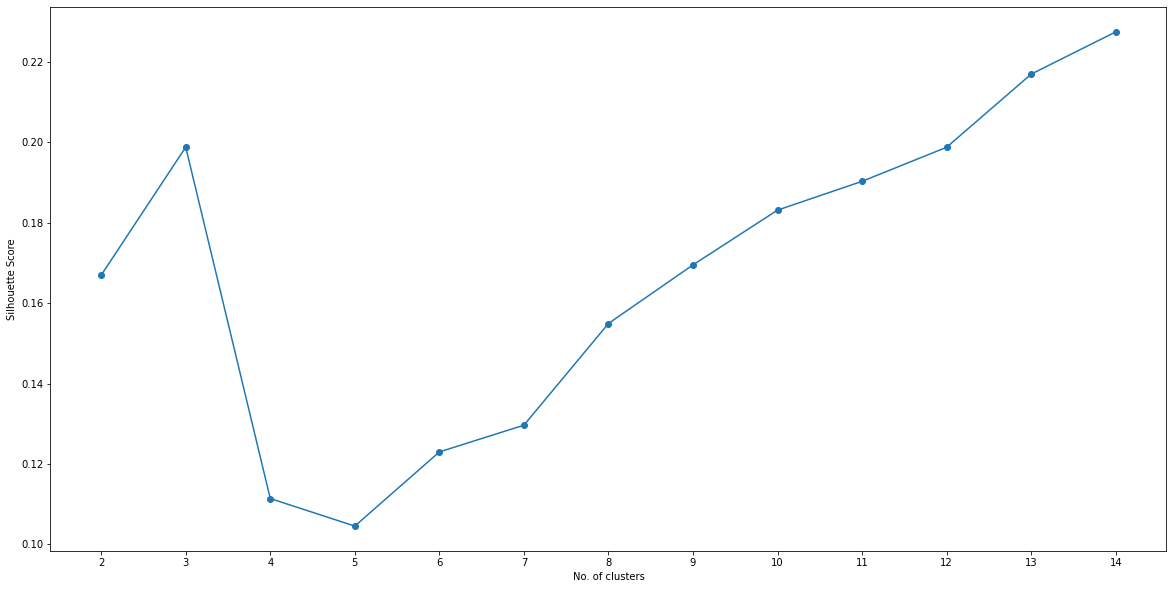

In [25]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")

In [26]:
opt_value = 8

In [27]:
man_clusters = opt_value

# Run k-means clustering
man_gc = man_grouped_clustering
kmeans = KMeans(n_clusters = man_clusters, init = 'k-means++', random_state = 0).fit(man_gc)

In [28]:
# Add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [29]:
man_final = man_data
man_final = man_final.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')
man_final.dropna(inplace = True)
man_final['Cluster Labels'] = man_final['Cluster Labels'].astype(int)
man_final.head()

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Category:Acton, London",51.506711,-0.267976,3,Pub,Gym / Fitness Center,Coffee Shop,Grocery Store,Indian Restaurant,Bakery,Creperie,Park,Fast Food Restaurant,Café
1,Category:Aldwych,53.451465,-2.227795,7,Middle Eastern Restaurant,Indian Restaurant,Café,Park,Hookah Bar,Halal Restaurant,Persian Restaurant,Gelato Shop,Coffee Shop,Mediterranean Restaurant
2,Category:Balham,53.470526,-2.226598,0,Beer Bar,Brewery,Café,Hotel,Bar,Chinese Restaurant,Monument / Landmark,Plaza,Museum,Music Venue
3,"Category:Barking, London",51.517420,-0.200040,2,Italian Restaurant,Bakery,Pub,Music Venue,Gym / Fitness Center,Market,Mediterranean Restaurant,Gourmet Shop,Boutique,Mexican Restaurant
4,"Category:Barnes, London",51.517420,-0.200040,2,Italian Restaurant,Bakery,Pub,Music Venue,Gym / Fitness Center,Market,Mediterranean Restaurant,Gourmet Shop,Boutique,Mexican Restaurant


In [43]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# Setup color scheme for different clusters
x = np.arange(man_clusters)
ys = [i + x + (i*x)**2 for i in range(man_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(man_final['Latitude'], man_final['Longitude'], man_final['Neighbourhood'], 
                                  man_final['Cluster Labels']):
    label = folium.Popup(str(poi) + ' (Cluster ' + str(cluster + 1) + ')', parse_html=True)
    map_clusters.add_child(
        folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7))
       
map_clusters

In [32]:
val = 1
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Category:Balham,Beer Bar,Brewery,Café,Hotel,Bar,Chinese Restaurant,Monument / Landmark,Plaza,Museum,Music Venue
10,Category:Bermondsey,Hotel,Bar,Asian Restaurant,Plaza,Coffee Shop,Theater,Tapas Restaurant,Beer Bar,Concert Hall,Steakhouse
13,"Category:Blackfriars, London",Bar,Hotel,Coffee Shop,Department Store,Italian Restaurant,Korean Restaurant,Latin American Restaurant,French Restaurant,Plaza,Dessert Shop
16,Category:Bow Common,Bar,Café,Plaza,Hotel,Italian Restaurant,Asian Restaurant,Steakhouse,Bookstore,Coffee Shop,Beer Bar
23,Category:Canning Town,Hotel,Pub,Hotel Bar,Café,Pool,Chinese Restaurant,Grocery Store,Tapas Restaurant,Bed & Breakfast,Sandwich Place
24,Category:Carshalton,Hotel,Bar,Asian Restaurant,Plaza,Coffee Shop,Theater,Tapas Restaurant,Beer Bar,Concert Hall,Steakhouse
37,Category:Crouch End,Hotel,Bar,Asian Restaurant,Plaza,Coffee Shop,Theater,Tapas Restaurant,Beer Bar,Concert Hall,Steakhouse
41,Category:Districts of the City of London,Hotel,Bar,Asian Restaurant,Plaza,Coffee Shop,Theater,Tapas Restaurant,Beer Bar,Concert Hall,Steakhouse
50,Category:Fitzrovia,Hotel,Bar,Asian Restaurant,Plaza,Coffee Shop,Theater,Tapas Restaurant,Beer Bar,Concert Hall,Steakhouse
53,Category:Frognal,Hotel,Bar,Asian Restaurant,Plaza,Coffee Shop,Theater,Tapas Restaurant,Beer Bar,Concert Hall,Steakhouse


In [33]:
val = 2
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
51,Category:Forest Gate,Supermarket,Train Station,Grocery Store,Yoga Studio,Food Court,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop
67,Category:Highbury,Supermarket,Gym,Park,Gas Station,Italian Restaurant,Fruit & Vegetable Store,Fried Chicken Joint,French Restaurant,Fountain,Forest
92,Category:Millbank,Supermarket,Furniture / Home Store,Indian Restaurant,Auto Garage,Yoga Studio,Food Court,Fish & Chips Shop,Flea Market,Flower Shop,Food
173,Agar Town,Supermarket,Pub,Gym / Fitness Center,Pharmacy,Food & Drink Shop,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food
177,Alperton,Supermarket,Pub,Park,Food Court,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Truck
190,Barking Riverside,Supermarket,Furniture / Home Store,Indian Restaurant,Auto Garage,Yoga Studio,Food Court,Fish & Chips Shop,Flea Market,Flower Shop,Food
204,Becontree,Supermarket,Pub,Playground,Clothing Store,Distillery,Farmers Market,Fruit & Vegetable Store,Fried Chicken Joint,French Restaurant,Fountain
205,Becontree Heath,Supermarket,Pub,Playground,Clothing Store,Distillery,Farmers Market,Fruit & Vegetable Store,Fried Chicken Joint,French Restaurant,Fountain
219,Berry's Green,Supermarket,Shoe Store,Pub,Indian Restaurant,Discount Store,Chinese Restaurant,Grocery Store,Hardware Store,Fish & Chips Shop,Flower Shop
223,Bexley Riverside,Supermarket,Furniture / Home Store,Indian Restaurant,Auto Garage,Yoga Studio,Food Court,Fish & Chips Shop,Flea Market,Flower Shop,Food


In [34]:
val = 3
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,"Category:Barking, London",Italian Restaurant,Bakery,Pub,Music Venue,Gym / Fitness Center,Market,Mediterranean Restaurant,Gourmet Shop,Boutique,Mexican Restaurant
4,"Category:Barnes, London",Italian Restaurant,Bakery,Pub,Music Venue,Gym / Fitness Center,Market,Mediterranean Restaurant,Gourmet Shop,Boutique,Mexican Restaurant
17,"Category:Bow, London",Italian Restaurant,Bakery,Pub,Music Venue,Gym / Fitness Center,Market,Mediterranean Restaurant,Gourmet Shop,Boutique,Mexican Restaurant
20,"Category:Brompton, London",Italian Restaurant,Bakery,Pub,Music Venue,Gym / Fitness Center,Market,Mediterranean Restaurant,Gourmet Shop,Boutique,Mexican Restaurant
26,"Category:Chelsea, London",Italian Restaurant,Bakery,Pub,Music Venue,Gym / Fitness Center,Market,Mediterranean Restaurant,Gourmet Shop,Boutique,Mexican Restaurant
27,"Category:Chinatown, London",Italian Restaurant,Bakery,Pub,Music Venue,Gym / Fitness Center,Market,Mediterranean Restaurant,Gourmet Shop,Boutique,Mexican Restaurant
35,"Category:Cowley, London",Italian Restaurant,Bakery,Pub,Music Venue,Gym / Fitness Center,Market,Mediterranean Restaurant,Gourmet Shop,Boutique,Mexican Restaurant
48,"Category:Farringdon, London",Italian Restaurant,Bakery,Pub,Music Venue,Gym / Fitness Center,Market,Mediterranean Restaurant,Gourmet Shop,Boutique,Mexican Restaurant
78,"Category:Kenton, London",Italian Restaurant,Bakery,Pub,Music Venue,Gym / Fitness Center,Market,Mediterranean Restaurant,Gourmet Shop,Boutique,Mexican Restaurant
82,"Category:Lee, London",Italian Restaurant,Bakery,Pub,Music Venue,Gym / Fitness Center,Market,Mediterranean Restaurant,Gourmet Shop,Boutique,Mexican Restaurant


In [35]:
val = 4
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Category:Acton, London",Pub,Gym / Fitness Center,Coffee Shop,Grocery Store,Indian Restaurant,Bakery,Creperie,Park,Fast Food Restaurant,Café
8,Category:Belgravia,Pub,Bar,Pizza Place,Deli / Bodega,Park,Gastropub,Nature Preserve,Food & Drink Shop,Falafel Restaurant,Grocery Store
18,Category:Brixton,Pub,Bar,Deli / Bodega,Indian Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Café,Restaurant,Pool,Cupcake Shop
21,Category:Cambridge Heath,Pub,Chinese Restaurant,Bar,Furniture / Home Store,Fruit & Vegetable Store,Fried Chicken Joint,French Restaurant,Fountain,Forest,Fast Food Restaurant
39,Category:Dalston,Furniture / Home Store,Pub,Antique Shop,Tapas Restaurant,Athletics & Sports,Yoga Studio,Food Court,Flea Market,Flower Shop,Food
40,Category:Deptford,Convenience Store,Pub,Coffee Shop,Soccer Field,Farmers Market,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop
49,Category:Finchley,Breakfast Spot,Chinese Restaurant,Pub,Convenience Store,Soccer Stadium,Fried Chicken Joint,French Restaurant,Fountain,Forest,Fast Food Restaurant
66,Category:Herne Hill,Bus Stop,Pub,Gym,Farmers Market,Sporting Goods Shop,Gym / Fitness Center,Pizza Place,Café,Soccer Field,Chinese Restaurant
68,Category:Highgate,Chinese Restaurant,Dessert Shop,Asian Restaurant,Pub,Indian Restaurant,Food & Drink Shop,Fast Food Restaurant,Fish & Chips Shop,Indie Theater,Flea Market
76,Category:Islington,Coffee Shop,Beer Bar,Pub,Cocktail Bar,Bar,Arts & Crafts Store,Tea Room,Bakery,Convenience Store,Food Court


In [36]:
val = 5
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Category:Barnsbury,Pub,Nature Preserve,Doctor's Office,Grocery Store,Supermarket,Food Court,Fish & Chips Shop,Flea Market,Flower Shop,Food
32,Category:Clapham,Fast Food Restaurant,Pub,Grocery Store,Hotel,Food Court,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop
75,Category:Isleworth,Grocery Store,Pub,Supermarket,Fast Food Restaurant,Gym,Warehouse Store,Stadium,Cricket Ground,Fish & Chips Shop,Flea Market
116,Category:Roehampton,Pub,Indian Restaurant,Grocery Store,Warehouse Store,Hardware Store,Garden Center,Food Court,Fish & Chips Shop,Flea Market,Diner
119,Category:Shepherd's Bush,Fast Food Restaurant,Pub,Athletics & Sports,Grocery Store,Food Court,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop
132,Category:Stamford Hill,Grocery Store,Pub,Chinese Restaurant,Indian Restaurant,Yoga Studio,Food & Drink Shop,Fish & Chips Shop,Flea Market,Flower Shop,Food
147,Category:Upminster,Pub,Fast Food Restaurant,Golf Course,Indian Restaurant,Park,Grocery Store,Fish & Chips Shop,Flea Market,Flower Shop,Food
182,Ardleigh Green,Grocery Store,Nature Preserve,Chinese Restaurant,Indian Restaurant,Food Court,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop
185,Avery Hill,Pub,Coffee Shop,Grocery Store,Yoga Studio,Food Court,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop
186,Bakers Arms,Pub,Gym,Grocery Store,Stadium,Doctor's Office,Train Station,Supermarket,Yoga Studio,Food,Fish & Chips Shop


In [37]:
val = 6
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Category:Bayswater,Supermarket,Park,Fast Food Restaurant,Shoe Store,Athletics & Sports,Tram Station,Gymnastics Gym,Bus Stop,Forest,Food Truck
7,Category:Beckton,Tram Station,Discount Store,Bakery,Fast Food Restaurant,Shopping Mall,Supermarket,Fish & Chips Shop,Tanning Salon,Market,Sandwich Place
33,"Category:Clapton, London",Park,Track Stadium,Tram Station,Supermarket,Soccer Field,Grocery Store,Fast Food Restaurant,Sporting Goods Shop,Discount Store,Pub
34,Category:Covent Garden,Grocery Store,Tram Station,Supermarket,Italian Restaurant,Airport Service,Café,Yoga Studio,Flea Market,Flower Shop,Food
36,Category:Cricklewood,Discount Store,Coffee Shop,Sandwich Place,Supermarket,Fast Food Restaurant,Tram Station,Bakery,Warehouse Store,Business Service,French Restaurant
43,Category:Eastcote,Discount Store,Supermarket,Tram Station,Pet Store,Bus Stop,Shopping Mall,Farmers Market,Grocery Store,Gym,Gym / Fitness Center
44,Category:Edgware,Supermarket,Park,Gymnastics Gym,Bus Stop,Athletics & Sports,Food Court,Flea Market,Flower Shop,Food,Food & Drink Shop
54,Category:Fulham,Supermarket,Bus Stop,Shoe Store,Athletics & Sports,Tram Station,Park,Yoga Studio,Food,Fish & Chips Shop,Flea Market
63,Category:Harringay,Supermarket,Bus Stop,Shoe Store,Athletics & Sports,Tram Station,Park,Yoga Studio,Food,Fish & Chips Shop,Flea Market
69,Category:Homerton,Supermarket,Park,Gymnastics Gym,Bus Stop,Athletics & Sports,Food Court,Flea Market,Flower Shop,Food,Food & Drink Shop


In [38]:
val = 7
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
226,Biggin Hill,Convenience Store,Miscellaneous Shop,Cricket Ground,Yoga Studio,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck
261,Bush Hill Park,Convenience Store,Miscellaneous Shop,Cricket Ground,Yoga Studio,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck
343,Dollis Hill,Convenience Store,Miscellaneous Shop,Cricket Ground,Yoga Studio,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck
350,Duppas Hill,Convenience Store,Miscellaneous Shop,Cricket Ground,Yoga Studio,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck


In [39]:
val = 8
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Category:Aldwych,Middle Eastern Restaurant,Indian Restaurant,Café,Park,Hookah Bar,Halal Restaurant,Persian Restaurant,Gelato Shop,Coffee Shop,Mediterranean Restaurant
9,Category:Belsize Park,Café,Bakery,Department Store,Movie Theater,Supermarket,Coffee Shop,Gift Shop,Greek Restaurant,Bookstore,Gym / Fitness Center
11,Category:Bethnal Green,Bus Stop,Convenience Store,Park,Sandwich Place,Café,Grocery Store,Indian Restaurant,Supermarket,Basketball Court,Gym Pool
12,Category:Bexleyheath,Bakery,Grocery Store,Newsagent,Gastropub,Fish & Chips Shop,Supermarket,English Restaurant,Smoke Shop,Kebab Restaurant,Gym / Fitness Center
14,"Category:Blackwall, London",Hotel,Sandwich Place,Café,Tennis Court,Gym,Grocery Store,Lounge,Sushi Restaurant,Supermarket,Steakhouse
15,Category:Bounds Green,Pub,Coffee Shop,Indian Restaurant,Grocery Store,Park,Bakery,Café,Golf Course,Tennis Court,Market
19,Category:Bromley-by-Bow,Garden Center,Pub,Park,Dam,Sandwich Place,Grocery Store,Trail,Flower Shop,Fast Food Restaurant,Fish & Chips Shop
22,Category:Camden Town,Pub,Hotel,Grocery Store,Train Station,Pizza Place,English Restaurant,Sandwich Place,Park,Food Truck,Bar
25,Category:Chadwell Heath,Indian Restaurant,Grocery Store,Pizza Place,Restaurant,Electronics Store,English Restaurant,Pharmacy,Park,Business Service,Breakfast Spot
28,Category:Chingford,Grocery Store,Park,Supermarket,Pharmacy,Café,Sports Club,Gym,Market,Bakery,Pastry Shop
